## Importing libreries

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np

In [10]:
df = gpd.read_file(r"data\site_try.shp")

In [11]:
df

,id,id_HH,dimension,hyd_ft,hh_min,hh_max,site_node,geometry
0,1,5,5.0,3,1,10,1,POINT (130507.941 4977580.558)
1,2,5,7.0,7,8,4,1,POINT (204677.659 4958309.387)
2,3,7,3.0,7,2,4,1,POINT (192693.906 4991507.623)
3,7,6,4.0,2,4,56,44,POINT (140386.441 4997337.558)


In [65]:
class Site:
    site_all = []
    
    def __init__(self, id, id_HH, dimension, hyd_ft, hh_min, hh_max, site_node, geometry):
        self.id = id
        self.id_HH = id_HH
        self.dimension = dimension
        self.hyd_ft = hyd_ft
        self.hh_min = hh_min
        self.hh_max = hh_max
        self.site_node = site_node
        self.geometry = geometry.x, geometry.y

        Site.site_all.append(self)

    @classmethod
    def instantiate_from_list(cls, path):
        geodf = gpd.read_file(path)
        for _, row in geodf.iterrows():
            Site(
                row.id,
                row.id_HH,
                row.dimension,
                row.hyd_ft,
                row.hh_min,
                row.hh_max,
                row.site_node,
                row.geometry
            )
    
    def return_df(self):
        information = []
        for n, site in enumerate(Site.site_all):
            information.append((Site.site_all[n].id,
                                Site.site_all[n].dimension,
                                Site.site_all[n].hyd_ft))
        df = pd.DataFrame(information, columns=["id", "dimension", "hyd_ft"])
        return df

    def plot():
        coordinates = []
        for n, site in enumerate(Site.site_all):
            coordinates.append(Site.site_all[n].geometry)
        coord_array = np.array(coordinates)
        sns.scatterplot(x = coord_array[:,0], y = coord_array[:,1])


    def __repr__(self):
        return f"{self.__class__.__name__}('{self.id}', {self.id_HH}, {self.dimension},{self.geometry})"

    def __getitem__(idx):
        return Site.site_all[idx]


    


In [66]:
Site.instantiate_from_list(r"data\site_try.shp")

In [71]:
len(Site.site_all)

4

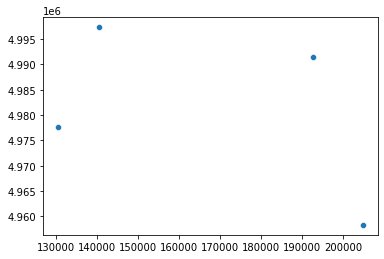

In [72]:
Site.plot()

In [73]:
Site.site_all[0].return_df()

,id,dimension,hyd_ft
0,1,5.0,3
1,2,7.0,7
2,3,3.0,7
3,7,4.0,2
